In [1]:
import numpy as np
import scipy
import pandas as pd
import matplotlib.pyplot as plt
from ensemble.distributions import distribution_dict
from ensemble.model import EnsembleFitter, EnsembleDistribution

data = pd.read_csv("microdata_2024_05_03.csv", encoding="latin-1")
data["year_id"] = np.around(np.mean(data["year_start"] / data["year_end"]), decimals=1)
data = data[["nid", "location_id", "year_id", "sex", "age", "age_start3", "fpg_mmol"]]

/var/folders/55/53rfb8cd7bd3rvs9lvgv5zyw0000gn/T/ipykernel_68134/2158923151.py:8: DtypeWarning: Columns (5,6,11,15,16,17,22,26,27,34,40,41,42) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("microdata_2024_05_03.csv", encoding="latin-1")


# Fitting individual distributions

/Users/maxbi/opt/anaconda3/envs/ensemble/lib/python3.12/site-packages/scipy/stats/_continuous_distns.py:2509: RuntimeWarning: divide by zero encountered in power
  return c*pow(x, c-1)*np.exp(-pow(x, c))


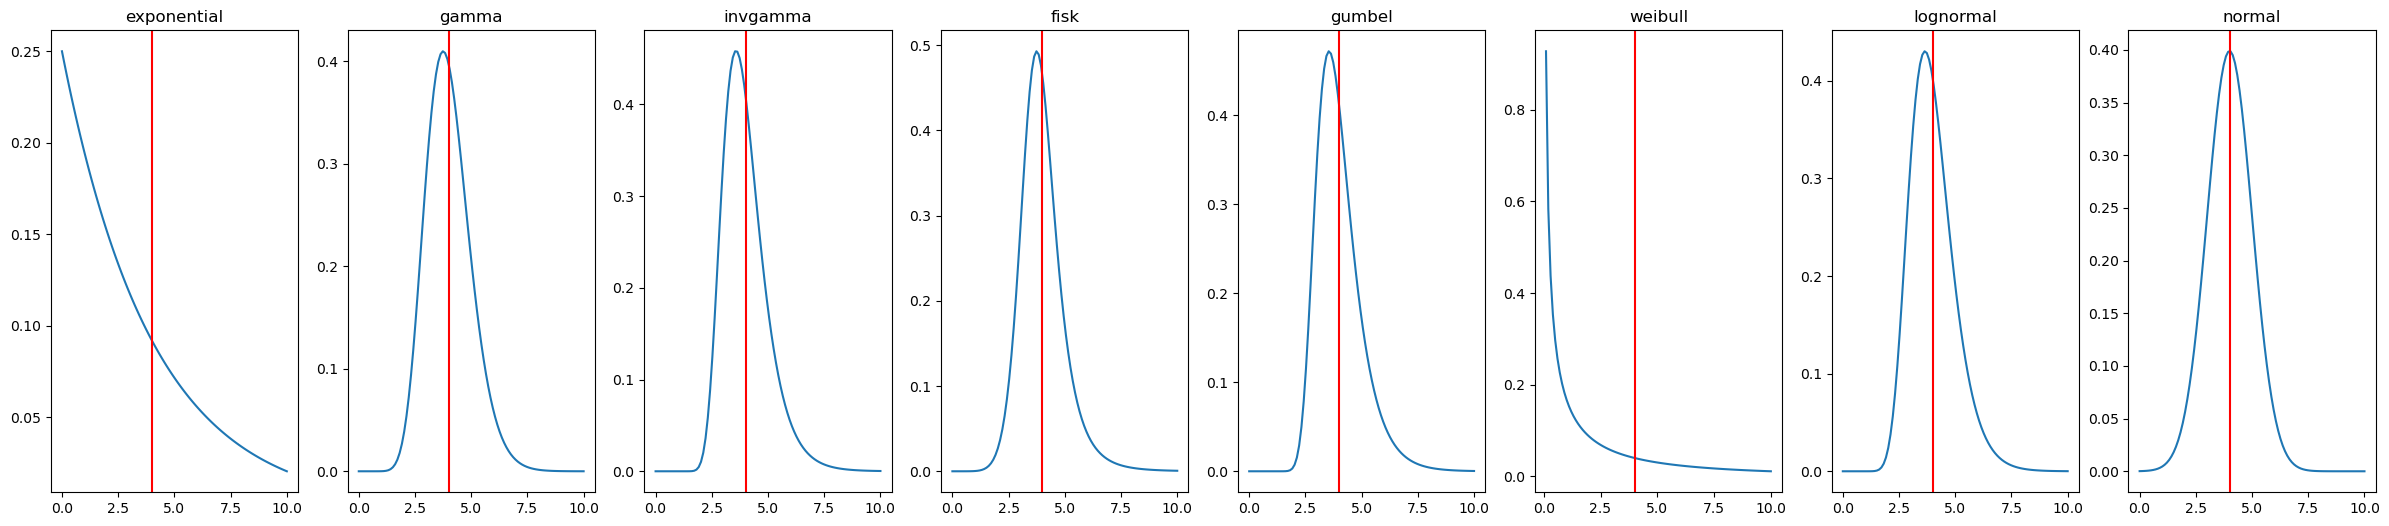

In [2]:
MEAN = 4
VARIANCE = 1
fitted_distributions = {}
counter = 0
fig, ax = plt.subplots(1, len(distribution_dict) - 1, figsize=(30, 6))
for distribution in distribution_dict:
  if distribution != "beta":
    fitted_distributions[distribution] = distribution_dict[distribution](MEAN, VARIANCE)
    support = np.linspace(0, 10, 100)
    pdf = fitted_distributions[distribution].pdf(support)
    ax[counter].plot(support, pdf)
    ax[counter].axvline(MEAN, color="red")
    ax[counter].title.set_text(distribution)
    counter += 1


# Fitting ensemble distributions

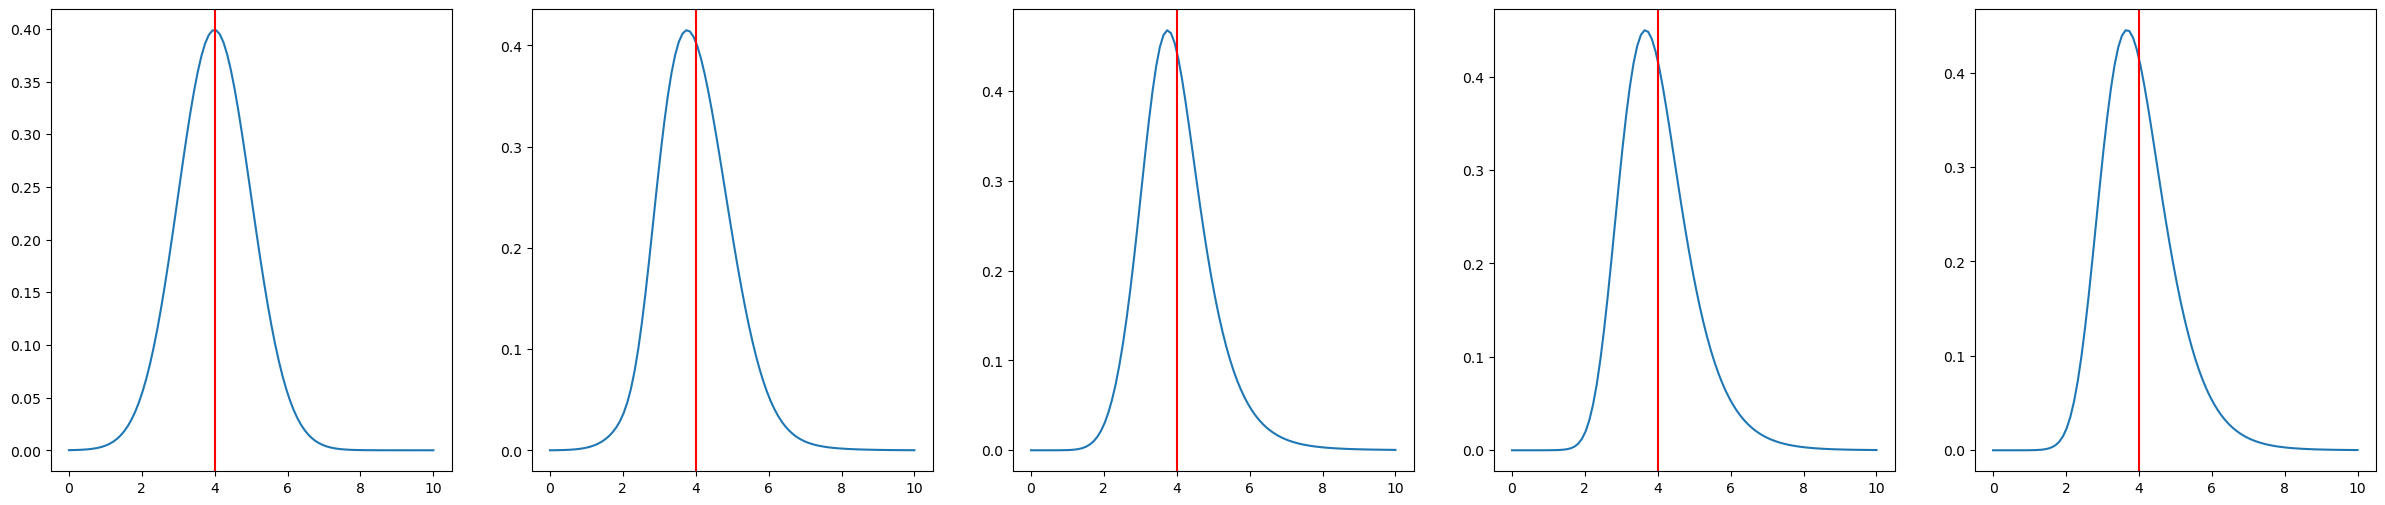

In [3]:
support = np.linspace(0, 10, 100)

def plot_ensembles(distributions, weights, mean, variance, support, figsize):
  fig, ax = plt.subplots(1, len(distributions), figsize=figsize)
  for i in range(len(distributions)):
    mod = EnsembleDistribution(distributions[i], weights[i], mean, variance)
    pdf = mod.pdf(support)
    ax[i].plot(support, pdf)
    ax[i].axvline(mean, color="red")

distributions = [["normal", "gumbel"],
                 ["normal", "gumbel"],
                 ["gamma", "fisk"],
                 ["invgamma", "lognormal", "fisk"],
                 ["gamma", "invgamma", "lognormal", "fisk"]]

weights = [[0.99, 0.01], [0.6, 0.4], [0.3, 0.7], [0.3, 0.5, 0.2], [0.2, 0.3, 0.3, 0.2]]

plot_ensembles(distributions, weights, MEAN, VARIANCE, support, (30, 6))

# Comparing fitted ensemble distributions to truth

10000 , num of empirical quantiles
10000 , num of empirical quantiles
10000 , num of empirical quantiles
10000 , num of empirical quantiles
10000 , num of empirical quantiles


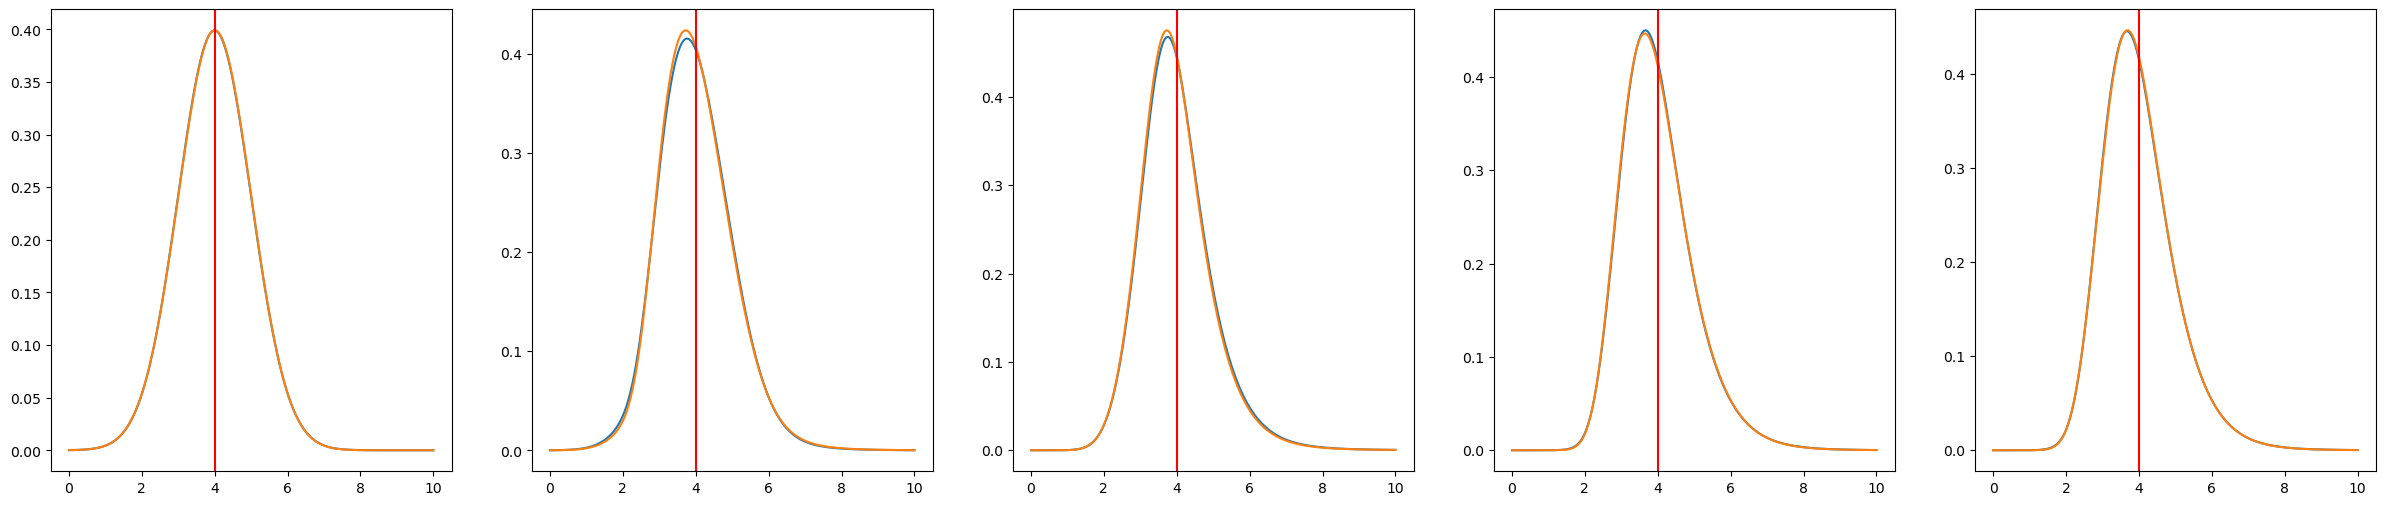

In [4]:
support = np.linspace(0, 10, 200)

def ensemble_comparison(distributions, weights, objective, mean, variance, support, figsize):
  fig, ax = plt.subplots(1, len(distributions), figsize=figsize)
  for i in range(len(distributions)):
    mod = EnsembleDistribution(distributions[i], weights[i], mean, variance)
    mod_draws = mod.rvs(size=10000)
    fit = EnsembleFitter(distributions[i], objective).fit(mod_draws)
    pdf = mod.pdf(support)
    ax[i].plot(support, pdf)
    ax[i].plot(support, fit.ensemble_distribution.pdf(support))
    ax[i].axvline(mean, color="red")

distributions = [["normal", "gumbel"],
                 ["normal", "gumbel"],
                 ["gamma", "fisk"],
                 ["invgamma", "lognormal", "fisk"],
                 ["gamma", "invgamma", "lognormal", "fisk"]]

weights = [[0.99, 0.01], [0.6, 0.4], [0.3, 0.7], [0.3, 0.5, 0.2], [0.2, 0.3, 0.3, 0.2]]

ensemble_comparison(distributions, weights, "KS", MEAN, VARIANCE, support, (30, 6))

# Diabetes

542
542 num unique fpgs
542 , num of empirical quantiles
1.1000074253128067 21.000005226688213


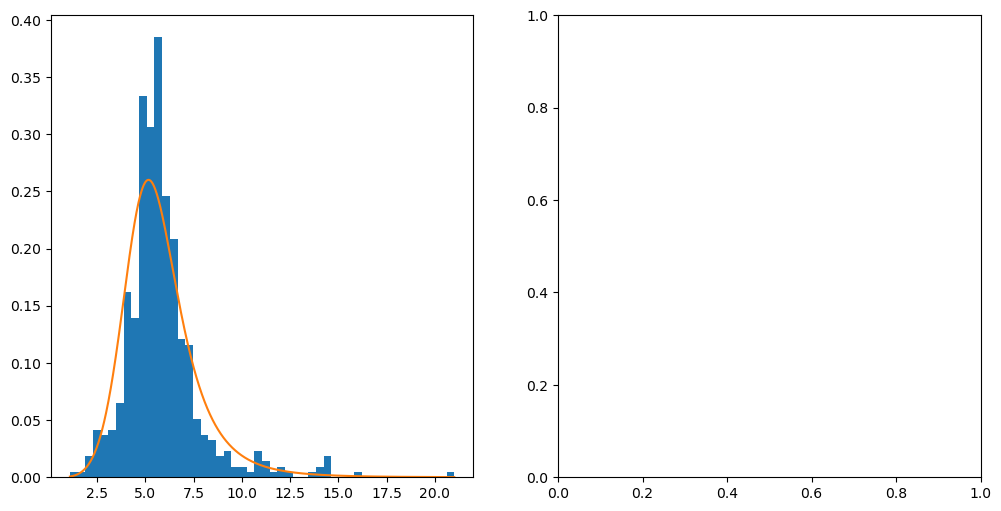

In [14]:
# print(data.columns)
# for col in data.columns:
#   if "id" in col.lower():
#     print(col)

nid_value = np.random.choice(data['nid'].unique())
location_id_value = np.random.choice(data['location_id'].unique())
year_id_value = np.random.choice(data['year_id'].unique())
sex_value = np.random.choice(data['sex'].unique())
age_value = np.random.choice(data['age'].unique())

filtered_df = data[(data['nid'] == nid_value) &
                #  (data['location_id'] == location_id_value) &
                 (data['year_id'] == year_id_value) &
                 (data['sex'] == sex_value)] # &
                #  (data['age'] == age_value)]

# Get the number of rows that match
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
num_rows = len(filtered_df)
print(num_rows)
model = EnsembleFitter(["gamma", "invgamma", "lognormal", "fisk"], "KS")
fpg = filtered_df["fpg_mmol"].to_numpy()
fpg = fpg + np.random.normal(loc=0, scale=0.00001, size=len(fpg))
print(len(np.unique(fpg)), "num unique fpgs")
# print(fpg)
res = model.fit(fpg)
pdf = res.ensemble_distribution.pdf(fpg)
support = np.linspace(np.min(fpg), np.max(fpg), 1000)
print(np.min(fpg), np.max(fpg))

ax[0].hist(fpg, density=True, bins=50)
ax[0].plot(support, res.ensemble_distribution.pdf(support))
# ax[i].axvline(mean, color="red")
